In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


In [5]:
# check distinct groups
print(FixData['Group'].unique())

[ 4.  1.  3.  2. nan]


In [6]:
# Remove Group = NaN
FixData=FixData[~FixData['Group'].isna()]

In [7]:
print(FixData['Group'].unique())

[4. 1. 3. 2.]


dataset size:  (249558, 12)
presentation size:  x= 1920 pixels y= 1080  pixels
presentation size:  x= 1920 pixels y= 1080  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y


info found for 193 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  193 observers and  36  stimuli.


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.84  +/-  9.78
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  6790
Mean X location:  477.7  +/-  92.1  pixels
Mean Y location:  465.8  +/-  65.7  pixels
Mean saccade  amplitude:  79.4  +/-  18.3  pixels
Mean scanpath  length:  2472.1  +/-  559.2  pixels
Data for  193 observers and  36  stimuli.
Mean fixation number:  36.84  +/-  9.78
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  6790
Mean X location:  477.7  +/-  92.1  pixels
Mean Y location:  465.8  +/-  65.7  pixels
Mean saccade  amplitude:  79.4  +/-  18.3  pixels
Mean scanpath  length:  2472.1  +/-  559.2  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21927', '21930', '21939',
        '21946', '22018', '22036', '22108', '22109', '22127', '22129',
        '22138', '22149', '22168', '22174', '22180', '22181', '22186',
        '22204', '22214', '22219', '22228', '22234', '22239', '22242',
        '22261', '22271', '22279', '22291', '22322', '22324', '22327',
        '22341', '22346', '22376', '22378', '22383', '22388', '22394',
        '22410', '22411', '

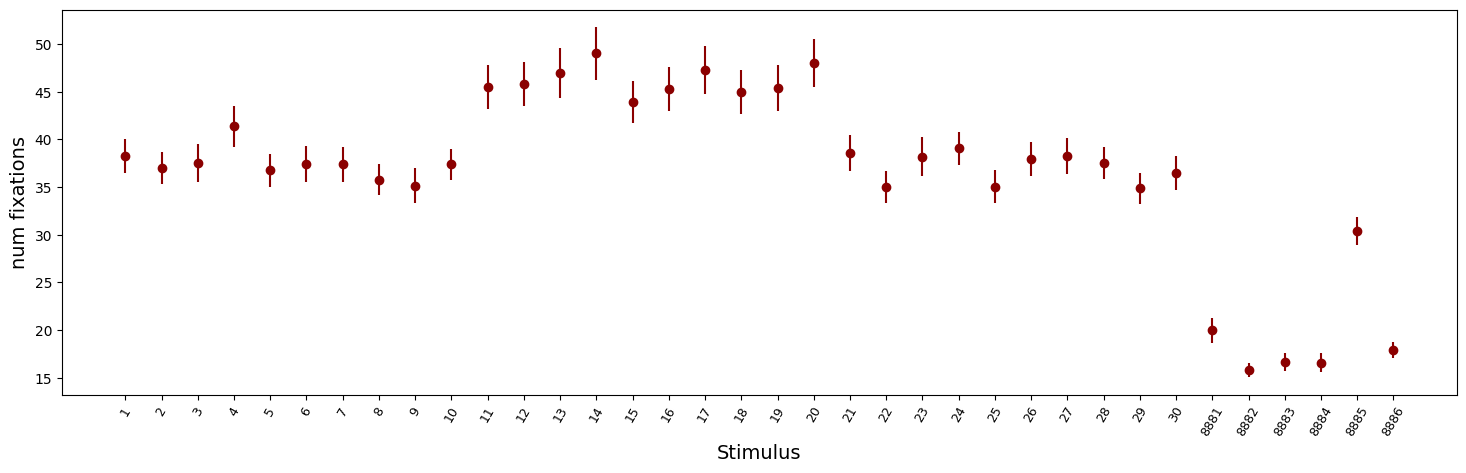

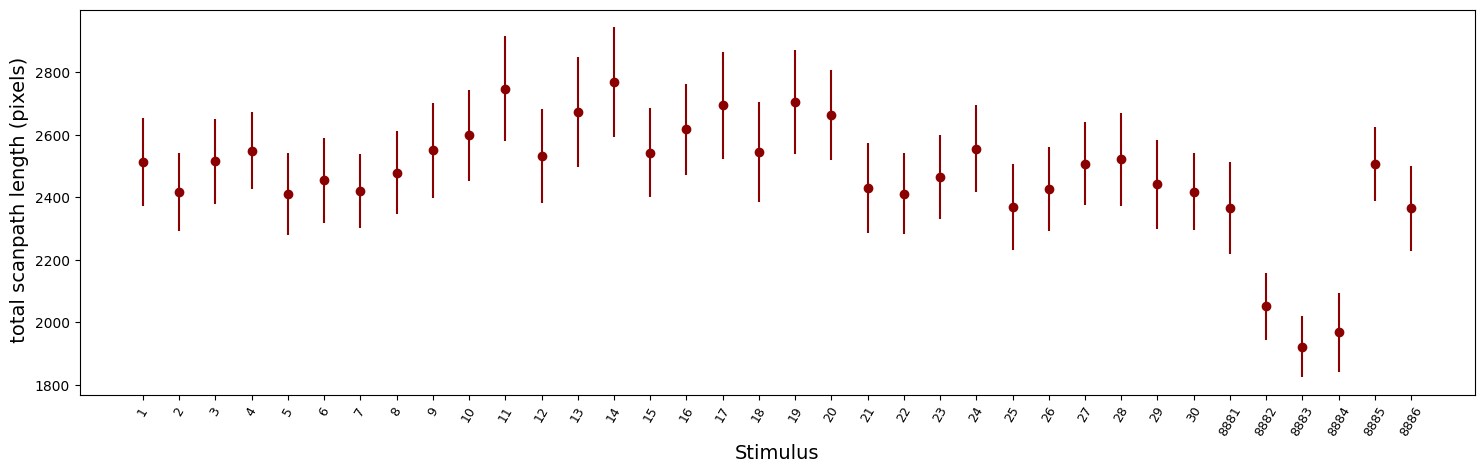

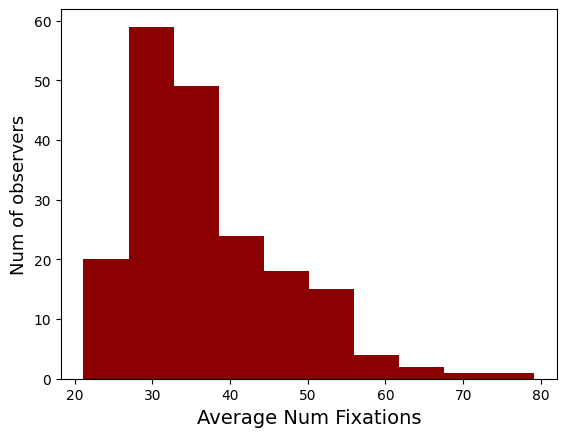

In [8]:

#sizeX,sizeY=1024, 768 
sizeX,sizeY=1920, 1080


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [9]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

11 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 26, 28, 31, 32]
25 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 2, 9: 1, 10: 3, 11: 2, 12: 1, 13: 3, 14: 1, 16: 1, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 2, 24: 2, 25: 1, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
27 Subjects with missing data: {112: 1, 42: 1, 116: 1, 52: 1, 10: 1, 15: 1, 17: 1, 90: 1, 113: 1, 82: 1, 20: 1, 40: 1, 94: 1, 54: 1, 43: 1, 81: 1, 14: 1, 2: 1, 65: 1, 72: 1, 57: 1, 25: 1, 63: 1, 8: 1, 27: 1, 75: 1, 79: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [10]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [1. 2. 3. 4.]


In [11]:
WhichC = np.array(WhichC, dtype=float)
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [12]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [13]:
x = DyslexiaDat.subjects
GrazSubs_Idx = [i for i, subj in enumerate(x) if 'P' in subj]
MunichSubs_Idx = [i for i, subj in enumerate(x) if 'P' not in subj]

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

In [14]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [15]:
list(set_subj)

[2,
 8,
 10,
 14,
 15,
 17,
 20,
 25,
 27,
 40,
 42,
 43,
 52,
 54,
 57,
 63,
 65,
 72,
 75,
 79,
 81,
 82,
 90,
 94,
 112,
 113,
 116]

In [16]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [17]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': regressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [18]:
stimuli = list(range(0, 30))

In [19]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\Utente\AppData\Local\Temp\ipykernel_172144\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered 

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [20]:
SaccadeObj = DyslexiaDat.GetSaccades()

In [21]:
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [22]:
Saccade.shape

(193, 36, 1, 1)

In [23]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=5)

In [24]:
SimMatrix.shape

(193, 193, 36, 1, 1)

In [25]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [26]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [27]:
Features.shape

(193, 30, 1, 1)

In [28]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(MunichSubs_Idx) - set_subj)

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(100):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=5, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=5, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [29]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 79 train subjects so 79 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

100
30
79
9


In [30]:
training_Vals[0][5][9][0][0][4] # mean saccade similarity group 0 subject with index 10 in the training list for stimulus 5 of the first fold

0.21438398494919628

---

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [33]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [34]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(100):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

#### Original

In [35]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [36]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7131434679031372
Epoch 5 loss: 0.4606546461582184
Epoch 10 loss: 0.36916568875312805
Epoch 15 loss: 0.3256061375141144
Epoch 0 loss: 0.730433464050293
Epoch 5 loss: 0.4113810956478119
Epoch 10 loss: 0.36096668243408203
Epoch 15 loss: 0.3252410888671875
Epoch 0 loss: 0.7201611399650574
Epoch 5 loss: 0.4079156816005707
Epoch 10 loss: 0.3424937427043915
Epoch 15 loss: 0.31567686796188354
Epoch 0 loss: 0.7518149614334106
Epoch 5 loss: 0.4379742741584778
Epoch 10 loss: 0.3533564805984497
Epoch 15 loss: 0.3426832854747772
Epoch 0 loss: 0.7302141189575195
Epoch 5 loss: 0.3983314037322998
Epoch 10 loss: 0.35612744092941284
Epoch 15 loss: 0.3278665542602539
Epoch 0 loss: 0.7457640171051025
Epoch 5 loss: 0.4502178132534027
Epoch 10 loss: 0.3677101731300354
Epoch 15 loss: 0.33771809935569763
Epoch 0 loss: 0.7137212753295898
Epoch 5 loss: 0.41651222109794617
Epoch 10 loss: 0.34449711441993713
Epoch 15 loss: 0.3232409954071045
Epoch 0 loss: 0.6997364163398743
Epoc

In [37]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7131434679031372
Epoch 5 loss: 0.49717408418655396
Epoch 10 loss: 0.40481486916542053
Epoch 15 loss: 0.33966389298439026
Epoch 0 loss: 0.730433464050293
Epoch 5 loss: 0.427478551864624
Epoch 10 loss: 0.38164523243904114
Epoch 15 loss: 0.3503635823726654
Epoch 0 loss: 0.7201611399650574
Epoch 5 loss: 0.4332576096057892
Epoch 10 loss: 0.3829038739204407
Epoch 15 loss: 0.33269158005714417
Epoch 0 loss: 0.7518149614334106
Epoch 5 loss: 0.44047972559928894
Epoch 10 loss: 0.3796793818473816
Epoch 15 loss: 0.3539484739303589
Epoch 0 loss: 0.7302141189575195
Epoch 5 loss: 0.422753244638443
Epoch 10 loss: 0.4134810268878937
Epoch 15 loss: 0.350059449672699
Epoch 0 loss: 0.7457640171051025
Epoch 5 loss: 0.48240363597869873
Epoch 10 loss: 0.3966444432735443
Epoch 15 loss: 0.36374202370643616
Epoch 0 loss: 0.7137212753295898
Epoch 5 loss: 0.44036608934402466
Epoch 10 loss: 0.36239707469940186
Epoch 15 loss: 0.3515934646129608
Epoch 0 loss: 0.6997364163398743
Epoc

Approximation Error: -6.095888602430932e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_172144\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


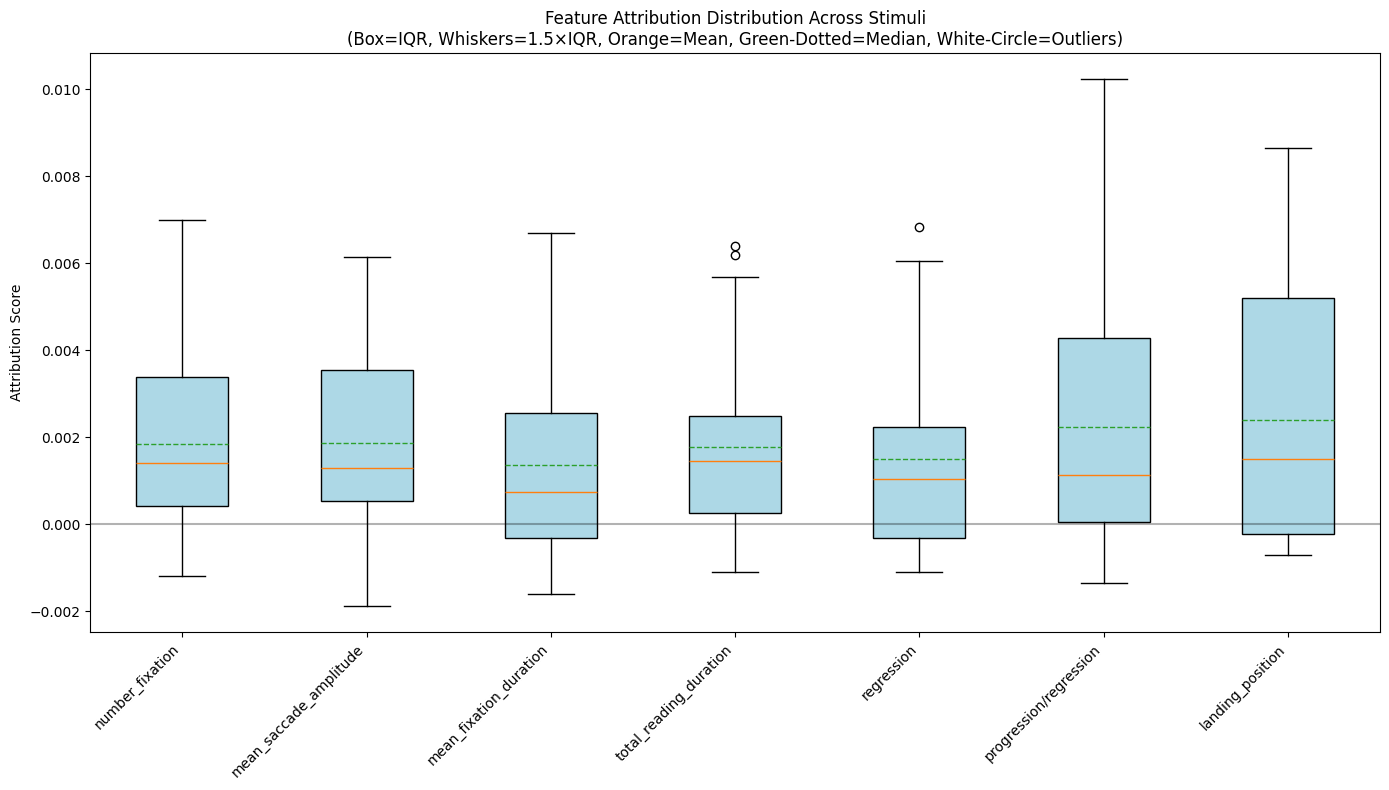


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0019, Std= 0.0022, Min=-0.0012, Max= 0.0070
mean_saccade_amplitude        : Mean= 0.0019, Std= 0.0022, Min=-0.0019, Max= 0.0061
mean_fixation_duration        : Mean= 0.0014, Std= 0.0022, Min=-0.0016, Max= 0.0067
total_reading_duration        : Mean= 0.0018, Std= 0.0022, Min=-0.0011, Max= 0.0064
regression                    : Mean= 0.0015, Std= 0.0022, Min=-0.0011, Max= 0.0068
progression/regression        : Mean= 0.0022, Std= 0.0029, Min=-0.0013, Max= 0.0102
landing_position              : Mean= 0.0024, Std= 0.0029, Min=-0.0007, Max= 0.0087


In [38]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original (without mean saccade amplitude)

In [39]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [40]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 140)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(140, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 35) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(35, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.793735682964325
Epoch 5 loss: 0.4235852360725403
Epoch 10 loss: 0.3582973778247833
Epoch 15 loss: 0.34061601758003235
Epoch 0 loss: 0.7556096315383911
Epoch 5 loss: 0.41910675168037415
Epoch 10 loss: 0.3504469096660614
Epoch 15 loss: 0.3414306044578552
Epoch 0 loss: 0.7275567650794983
Epoch 5 loss: 0.4294252097606659
Epoch 10 loss: 0.34181514382362366
Epoch 15 loss: 0.3303203582763672
Epoch 0 loss: 0.7205352783203125
Epoch 5 loss: 0.4365013837814331
Epoch 10 loss: 0.34117501974105835
Epoch 15 loss: 0.3179859220981598
Epoch 0 loss: 0.6658161878585815
Epoch 5 loss: 0.3858913779258728
Epoch 10 loss: 0.33066579699516296
Epoch 15 loss: 0.3177465498447418
Epoch 0 loss: 0.7471939325332642
Epoch 5 loss: 0.40952542424201965
Epoch 10 loss: 0.33122506737709045
Epoch 15 loss: 0.32014504075050354
Epoch 0 loss: 0.6643737554550171
Epoch 5 loss: 0.39821118116378784
Epoch 10 loss: 0.35361728072166443
Epoch 15 loss: 0.3375599682331085
Epoch 0 loss: 0.7522683143615723
E

In [41]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.793735682964325
Epoch 5 loss: 0.451153963804245
Epoch 10 loss: 0.3841632604598999
Epoch 15 loss: 0.3563920855522156
Epoch 0 loss: 0.7556096315383911
Epoch 5 loss: 0.43696391582489014
Epoch 10 loss: 0.38296160101890564
Epoch 15 loss: 0.36523178219795227
Epoch 0 loss: 0.7275567650794983
Epoch 5 loss: 0.4668218791484833
Epoch 10 loss: 0.3765139877796173
Epoch 15 loss: 0.34992706775665283
Epoch 0 loss: 0.7205352783203125
Epoch 5 loss: 0.47367599606513977
Epoch 10 loss: 0.3760978877544403
Epoch 15 loss: 0.35425835847854614
Epoch 0 loss: 0.6658161878585815
Epoch 5 loss: 0.411102294921875
Epoch 10 loss: 0.3582495152950287
Epoch 15 loss: 0.3286852240562439
Epoch 0 loss: 0.7471939325332642
Epoch 5 loss: 0.4421406388282776
Epoch 10 loss: 0.36698010563850403
Epoch 15 loss: 0.3519931733608246
Epoch 0 loss: 0.6643737554550171
Epoch 5 loss: 0.4259291887283325
Epoch 10 loss: 0.3781847357749939
Epoch 15 loss: 0.35431787371635437
Epoch 0 loss: 0.7522683143615723
Epoch

Approximation Error: 4.2860010580625385e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_172144\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


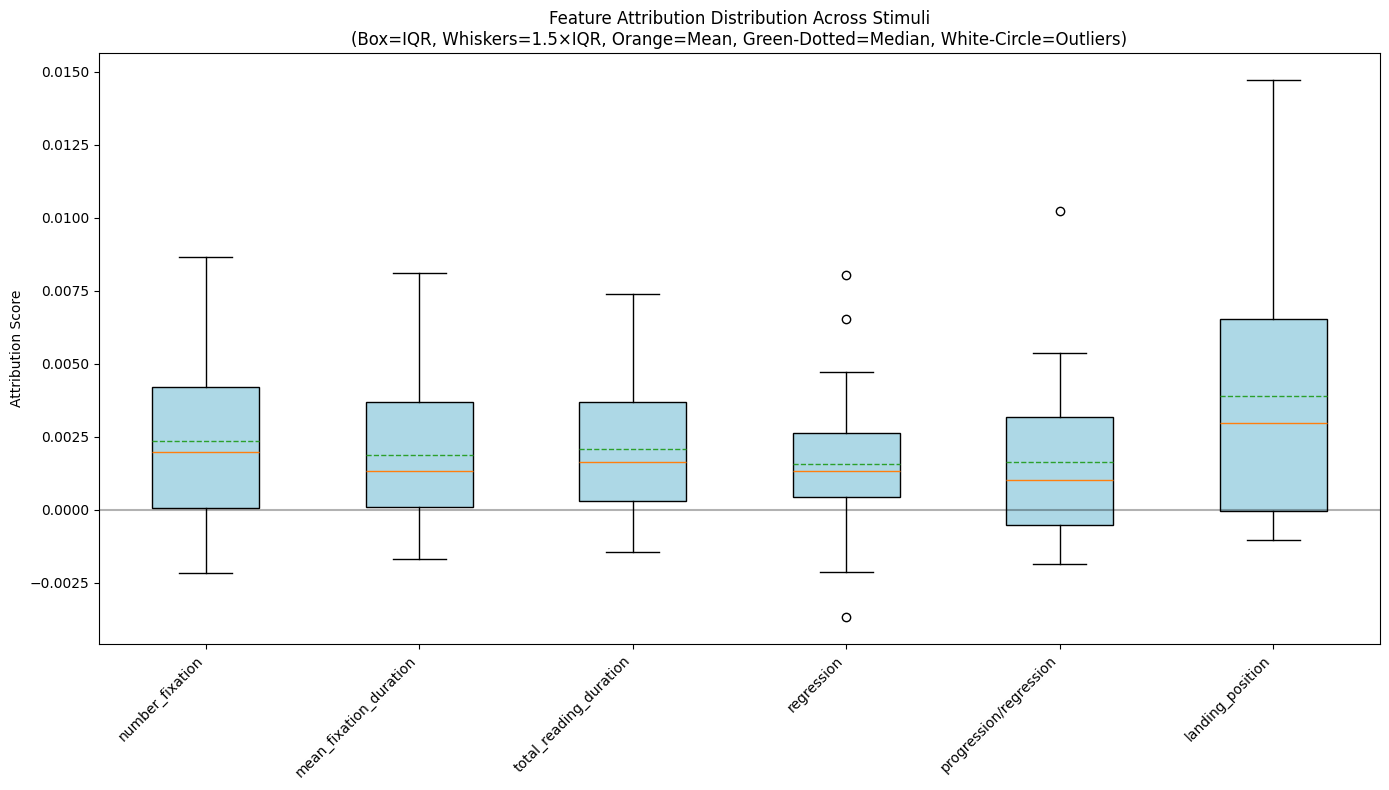


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0024, Std= 0.0027, Min=-0.0022, Max= 0.0087
mean_fixation_duration        : Mean= 0.0019, Std= 0.0025, Min=-0.0017, Max= 0.0081
total_reading_duration        : Mean= 0.0021, Std= 0.0024, Min=-0.0014, Max= 0.0074
regression                    : Mean= 0.0016, Std= 0.0024, Min=-0.0037, Max= 0.0080
progression/regression        : Mean= 0.0016, Std= 0.0027, Min=-0.0018, Max= 0.0102
landing_position              : Mean= 0.0039, Std= 0.0043, Min=-0.0010, Max= 0.0147


In [42]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original + Additional Features

In [43]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [44]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8288525938987732
Epoch 5 loss: 0.4238378703594208
Epoch 10 loss: 0.343171626329422
Epoch 15 loss: 0.3216562867164612
Epoch 0 loss: 0.7833547592163086
Epoch 5 loss: 0.4160570502281189
Epoch 10 loss: 0.350898802280426
Epoch 15 loss: 0.3302916884422302
Epoch 0 loss: 0.7440958619117737
Epoch 5 loss: 0.3954187333583832
Epoch 10 loss: 0.32414963841438293
Epoch 15 loss: 0.3146640360355377
Epoch 0 loss: 0.6457067131996155
Epoch 5 loss: 0.35831886529922485
Epoch 10 loss: 0.33468863368034363
Epoch 15 loss: 0.31992867588996887
Epoch 0 loss: 0.6939080357551575
Epoch 5 loss: 0.40561965107917786
Epoch 10 loss: 0.3452448844909668
Epoch 15 loss: 0.3219095468521118
Epoch 0 loss: 0.687343955039978
Epoch 5 loss: 0.39541012048721313
Epoch 10 loss: 0.3360675275325775
Epoch 15 loss: 0.3231557309627533
Epoch 0 loss: 0.7194271683692932
Epoch 5 loss: 0.39451682567596436
Epoch 10 loss: 0.3369085490703583
Epoch 15 loss: 0.31918764114379883
Epoch 0 loss: 0.6778672933578491
Epoch

In [45]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8288525938987732
Epoch 5 loss: 0.4396642744541168
Epoch 10 loss: 0.36479806900024414
Epoch 15 loss: 0.332672119140625
Epoch 0 loss: 0.7833547592163086
Epoch 5 loss: 0.43822962045669556
Epoch 10 loss: 0.3780927062034607
Epoch 15 loss: 0.34418201446533203
Epoch 0 loss: 0.7440958619117737
Epoch 5 loss: 0.4177600145339966
Epoch 10 loss: 0.3478493094444275
Epoch 15 loss: 0.329466849565506
Epoch 0 loss: 0.6457067131996155
Epoch 5 loss: 0.38897421956062317
Epoch 10 loss: 0.36057719588279724
Epoch 15 loss: 0.32999691367149353
Epoch 0 loss: 0.6939080357551575
Epoch 5 loss: 0.41323229670524597
Epoch 10 loss: 0.3557163178920746
Epoch 15 loss: 0.3381439745426178
Epoch 0 loss: 0.687343955039978
Epoch 5 loss: 0.4042739272117615
Epoch 10 loss: 0.3486306667327881
Epoch 15 loss: 0.3488728106021881
Epoch 0 loss: 0.7194271683692932
Epoch 5 loss: 0.4178132712841034
Epoch 10 loss: 0.36279773712158203
Epoch 15 loss: 0.34564584493637085
Epoch 0 loss: 0.6778672933578491
Epoc

Approximation Error: 1.0336256309528835e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_172144\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


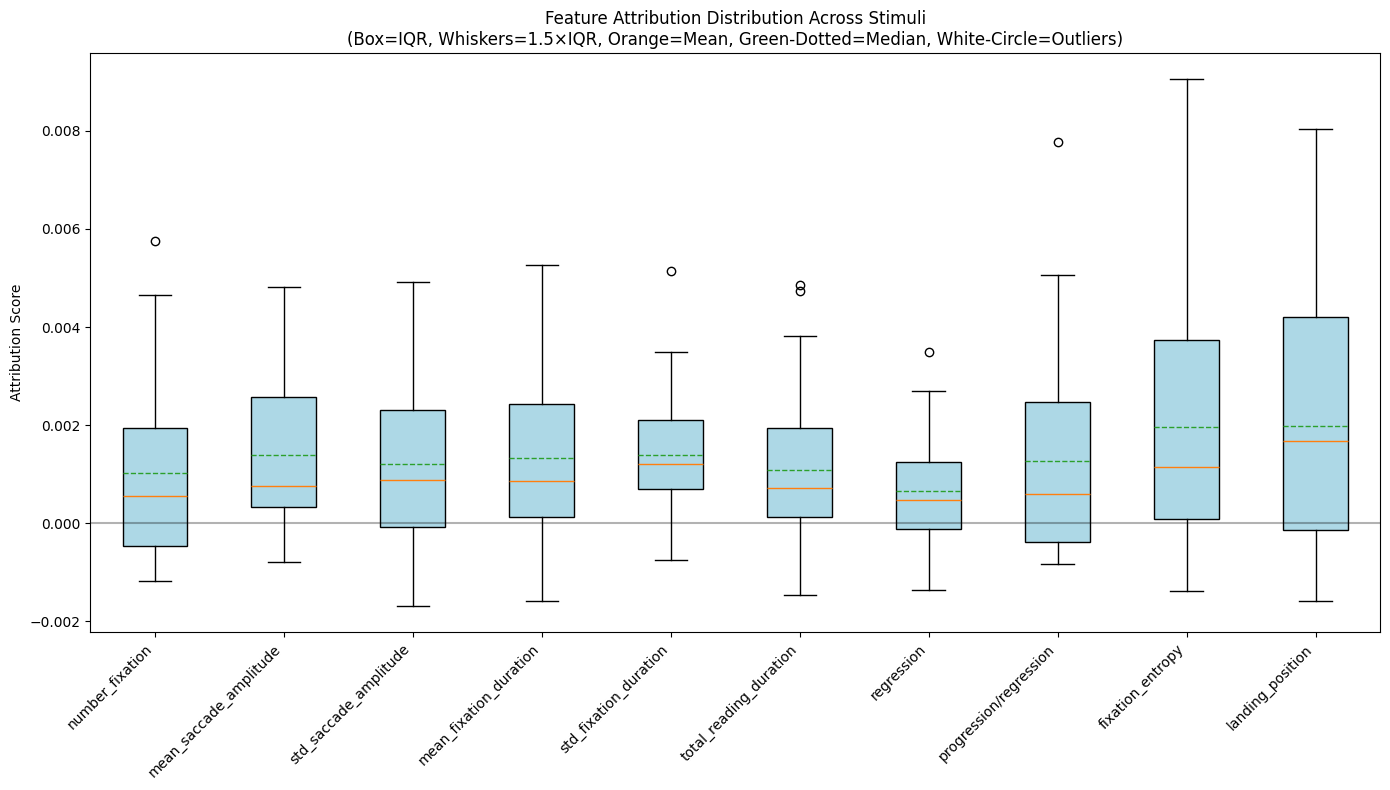


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0010, Std= 0.0018, Min=-0.0012, Max= 0.0058
mean_saccade_amplitude        : Mean= 0.0014, Std= 0.0016, Min=-0.0008, Max= 0.0048
std_saccade_amplitude         : Mean= 0.0012, Std= 0.0017, Min=-0.0017, Max= 0.0049
mean_fixation_duration        : Mean= 0.0013, Std= 0.0017, Min=-0.0016, Max= 0.0053
std_fixation_duration         : Mean= 0.0014, Std= 0.0014, Min=-0.0008, Max= 0.0051
total_reading_duration        : Mean= 0.0011, Std= 0.0016, Min=-0.0015, Max= 0.0049
regression                    : Mean= 0.0007, Std= 0.0012, Min=-0.0013, Max= 0.0035
progression/regression        : Mean= 0.0013, Std= 0.0020, Min=-0.0008, Max= 0.0078
fixation_entropy              : Mean= 0.0020, Std= 0.0027, Min=-0.0014, Max= 0.0090
landing_position              : Mean= 0.0020, Std= 0.0024, Min=-0.0016, Max= 0.0080


In [46]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Similarity features (Avg + Std)

In [47]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [48]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [49]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7430099248886108
Epoch 5 loss: 0.3722831904888153
Epoch 10 loss: 0.3208375871181488
Epoch 15 loss: 0.3172079026699066
Epoch 0 loss: 0.7070119380950928
Epoch 5 loss: 0.39206910133361816
Epoch 10 loss: 0.3296116590499878
Epoch 15 loss: 0.3156839907169342
Epoch 0 loss: 0.6953218579292297
Epoch 5 loss: 0.3884339928627014
Epoch 10 loss: 0.33049386739730835
Epoch 15 loss: 0.3148687779903412
Epoch 0 loss: 0.7442340850830078
Epoch 5 loss: 0.3974333107471466
Epoch 10 loss: 0.3291417956352234
Epoch 15 loss: 0.31701168417930603
Epoch 0 loss: 0.7043318152427673
Epoch 5 loss: 0.3915984332561493
Epoch 10 loss: 0.35145437717437744
Epoch 15 loss: 0.3148609697818756
Epoch 0 loss: 0.7201351523399353
Epoch 5 loss: 0.40851688385009766
Epoch 10 loss: 0.3338521718978882
Epoch 15 loss: 0.3209868371486664
Epoch 0 loss: 0.749455451965332
Epoch 5 loss: 0.3810719847679138
Epoch 10 loss: 0.31984132528305054
Epoch 15 loss: 0.3162095248699188
Epoch 0 loss: 0.7441519498825073
Epoch

In [50]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7430099248886108
Epoch 5 loss: 0.389778196811676
Epoch 10 loss: 0.34360456466674805
Epoch 15 loss: 0.328279584646225
Epoch 0 loss: 0.7070119380950928
Epoch 5 loss: 0.4153798818588257
Epoch 10 loss: 0.3450964093208313
Epoch 15 loss: 0.33402830362319946
Epoch 0 loss: 0.6953218579292297
Epoch 5 loss: 0.40911218523979187
Epoch 10 loss: 0.3498443067073822
Epoch 15 loss: 0.3236229121685028
Epoch 0 loss: 0.7442340850830078
Epoch 5 loss: 0.43484246730804443
Epoch 10 loss: 0.3527752757072449
Epoch 15 loss: 0.333015114068985
Epoch 0 loss: 0.7043318152427673
Epoch 5 loss: 0.4257121980190277
Epoch 10 loss: 0.38492974638938904
Epoch 15 loss: 0.32551854848861694
Epoch 0 loss: 0.7201351523399353
Epoch 5 loss: 0.44509589672088623
Epoch 10 loss: 0.36204075813293457
Epoch 15 loss: 0.3352281153202057
Epoch 0 loss: 0.749455451965332
Epoch 5 loss: 0.4071570634841919
Epoch 10 loss: 0.3415850102901459
Epoch 15 loss: 0.3300325870513916
Epoch 0 loss: 0.7441519498825073
Epoch 

Approximation Error: 0.00011068255844293162 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_172144\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


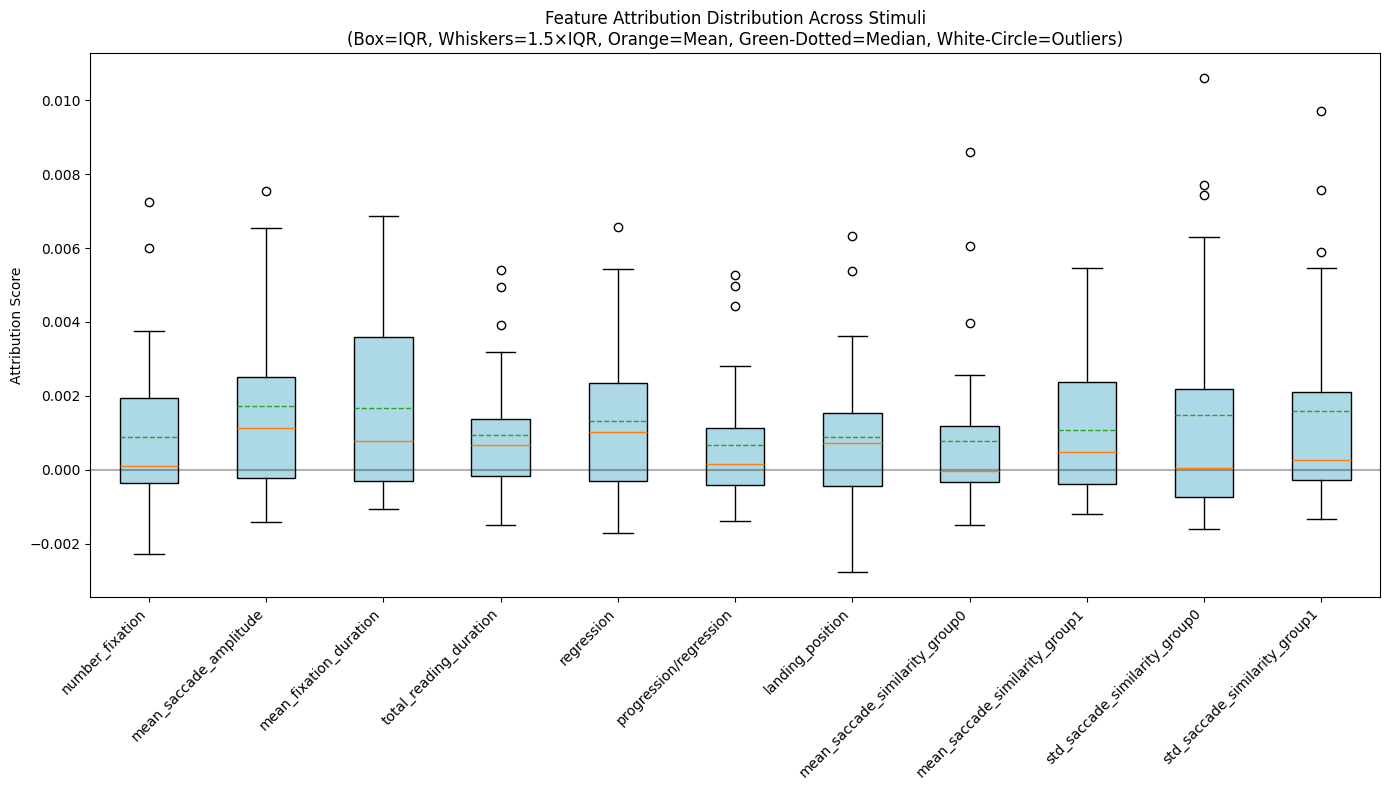


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0009, Std= 0.0022, Min=-0.0023, Max= 0.0072
mean_saccade_amplitude        : Mean= 0.0017, Std= 0.0023, Min=-0.0014, Max= 0.0076
mean_fixation_duration        : Mean= 0.0017, Std= 0.0024, Min=-0.0011, Max= 0.0069
total_reading_duration        : Mean= 0.0009, Std= 0.0017, Min=-0.0015, Max= 0.0054
regression                    : Mean= 0.0013, Std= 0.0020, Min=-0.0017, Max= 0.0066
progression/regression        : Mean= 0.0007, Std= 0.0017, Min=-0.0014, Max= 0.0053
landing_position              : Mean= 0.0009, Std= 0.0020, Min=-0.0028, Max= 0.0063
mean_saccade_similarity_group0: Mean= 0.0008, Std= 0.0021, Min=-0.0015, Max= 0.0086
mean_saccade_similarity_group1: Mean= 0.0011, Std= 0.0019, Min=-0.0012, Max= 0.0054
std_saccade_similarity_group0 : Mean= 0.0015, Std= 0.0031, Min=-0.0016, Max= 0.0106
std_saccade_similarity_group1 : Mean= 0.0016, Std= 0.0028, Min=-0.001

In [51]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity

In [52]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [53]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 140)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(140, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 35) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(35, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7719013690948486
Epoch 5 loss: 0.40095558762550354
Epoch 10 loss: 0.35280197858810425
Epoch 15 loss: 0.3162297010421753
Epoch 0 loss: 0.7142497301101685
Epoch 5 loss: 0.39030373096466064
Epoch 10 loss: 0.35710278153419495
Epoch 15 loss: 0.3212744891643524
Epoch 0 loss: 0.7270494103431702
Epoch 5 loss: 0.44281113147735596
Epoch 10 loss: 0.33063510060310364
Epoch 15 loss: 0.31891047954559326
Epoch 0 loss: 0.7513247132301331
Epoch 5 loss: 0.4211547076702118
Epoch 10 loss: 0.35590216517448425
Epoch 15 loss: 0.32241344451904297
Epoch 0 loss: 0.7620575428009033
Epoch 5 loss: 0.4193374514579773
Epoch 10 loss: 0.3347167372703552
Epoch 15 loss: 0.32203978300094604
Epoch 0 loss: 0.7125469446182251
Epoch 5 loss: 0.40988782048225403
Epoch 10 loss: 0.3319615125656128
Epoch 15 loss: 0.3166866898536682
Epoch 0 loss: 0.8116387724876404
Epoch 5 loss: 0.44544726610183716
Epoch 10 loss: 0.3422159254550934
Epoch 15 loss: 0.32034561038017273
Epoch 0 loss: 0.68144738674163

In [54]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7719013690948486
Epoch 5 loss: 0.42987969517707825
Epoch 10 loss: 0.38127321004867554
Epoch 15 loss: 0.34540224075317383
Epoch 0 loss: 0.7142497301101685
Epoch 5 loss: 0.4204367995262146
Epoch 10 loss: 0.3712210953235626
Epoch 15 loss: 0.35170605778694153
Epoch 0 loss: 0.7270494103431702
Epoch 5 loss: 0.4815060496330261
Epoch 10 loss: 0.3757491409778595
Epoch 15 loss: 0.339619904756546
Epoch 0 loss: 0.7513247132301331
Epoch 5 loss: 0.4548723101615906
Epoch 10 loss: 0.39195871353149414
Epoch 15 loss: 0.3462672531604767
Epoch 0 loss: 0.7620575428009033
Epoch 5 loss: 0.4484657645225525
Epoch 10 loss: 0.3608822822570801
Epoch 15 loss: 0.3509792685508728
Epoch 0 loss: 0.7125469446182251
Epoch 5 loss: 0.4460872709751129
Epoch 10 loss: 0.3555026650428772
Epoch 15 loss: 0.33497926592826843
Epoch 0 loss: 0.8116387724876404
Epoch 5 loss: 0.4840320646762848
Epoch 10 loss: 0.3839160203933716
Epoch 15 loss: 0.3429250419139862
Epoch 0 loss: 0.6814473867416382
Epoch

Approximation Error: -9.364321158500388e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_172144\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


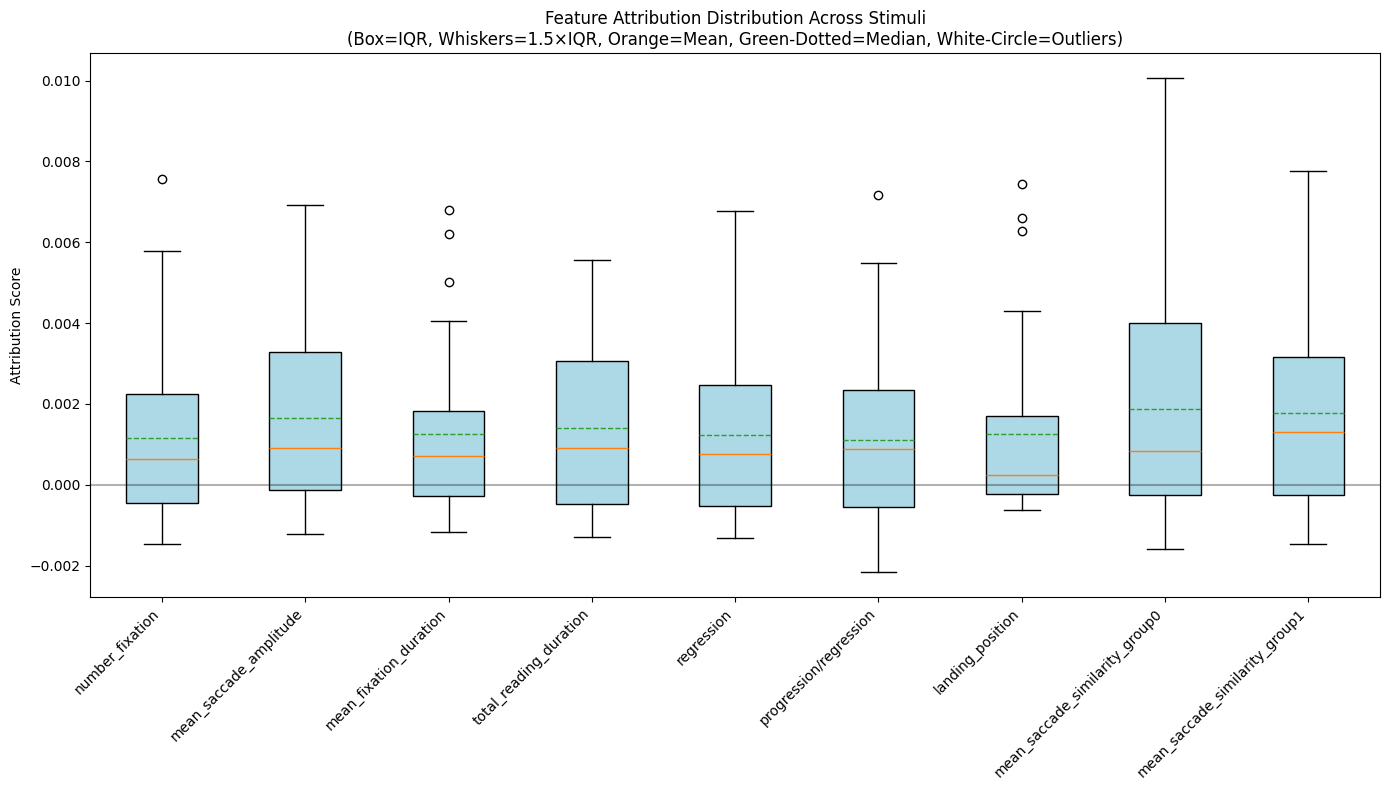


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0011, Std= 0.0021, Min=-0.0015, Max= 0.0076
mean_saccade_amplitude        : Mean= 0.0017, Std= 0.0022, Min=-0.0012, Max= 0.0069
mean_fixation_duration        : Mean= 0.0013, Std= 0.0021, Min=-0.0012, Max= 0.0068
total_reading_duration        : Mean= 0.0014, Std= 0.0022, Min=-0.0013, Max= 0.0056
regression                    : Mean= 0.0012, Std= 0.0022, Min=-0.0013, Max= 0.0068
progression/regression        : Mean= 0.0011, Std= 0.0023, Min=-0.0022, Max= 0.0072
landing_position              : Mean= 0.0013, Std= 0.0022, Min=-0.0006, Max= 0.0074
mean_saccade_similarity_group0: Mean= 0.0019, Std= 0.0028, Min=-0.0016, Max= 0.0101
mean_saccade_similarity_group1: Mean= 0.0018, Std= 0.0025, Min=-0.0015, Max= 0.0078


In [55]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity features (no mean saccade amplitude)

In [56]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [57]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 140)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(140, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 35) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(35, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7020358443260193
Epoch 5 loss: 0.40534788370132446
Epoch 10 loss: 0.34932705760002136
Epoch 15 loss: 0.3145776093006134
Epoch 0 loss: 0.7660468220710754
Epoch 5 loss: 0.38795602321624756
Epoch 10 loss: 0.3335498869419098
Epoch 15 loss: 0.31728124618530273
Epoch 0 loss: 0.7708861231803894
Epoch 5 loss: 0.4435921311378479
Epoch 10 loss: 0.34227123856544495
Epoch 15 loss: 0.32647305727005005
Epoch 0 loss: 0.7271604537963867
Epoch 5 loss: 0.38225024938583374
Epoch 10 loss: 0.3490290343761444
Epoch 15 loss: 0.3292142152786255
Epoch 0 loss: 0.7400667071342468
Epoch 5 loss: 0.43201300501823425
Epoch 10 loss: 0.3346296548843384
Epoch 15 loss: 0.3343023359775543
Epoch 0 loss: 0.6710515022277832
Epoch 5 loss: 0.40802842378616333
Epoch 10 loss: 0.343443363904953
Epoch 15 loss: 0.3169965147972107
Epoch 0 loss: 0.7361350655555725
Epoch 5 loss: 0.4401266276836395
Epoch 10 loss: 0.3468019366264343
Epoch 15 loss: 0.32179340720176697
Epoch 0 loss: 0.6627783179283142
E

In [58]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7020358443260193
Epoch 5 loss: 0.43853557109832764
Epoch 10 loss: 0.3698207139968872
Epoch 15 loss: 0.3303474187850952
Epoch 0 loss: 0.7660468220710754
Epoch 5 loss: 0.4107986092567444
Epoch 10 loss: 0.360637366771698
Epoch 15 loss: 0.34422409534454346
Epoch 0 loss: 0.7708861231803894
Epoch 5 loss: 0.46984612941741943
Epoch 10 loss: 0.38460028171539307
Epoch 15 loss: 0.3489987850189209
Epoch 0 loss: 0.7271604537963867
Epoch 5 loss: 0.4055303633213043
Epoch 10 loss: 0.3663553297519684
Epoch 15 loss: 0.34206849336624146
Epoch 0 loss: 0.7400667071342468
Epoch 5 loss: 0.45485222339630127
Epoch 10 loss: 0.3569776713848114
Epoch 15 loss: 0.3571508824825287
Epoch 0 loss: 0.6710515022277832
Epoch 5 loss: 0.4349200129508972
Epoch 10 loss: 0.36919406056404114
Epoch 15 loss: 0.3377941846847534
Epoch 0 loss: 0.7361350655555725
Epoch 5 loss: 0.467633992433548
Epoch 10 loss: 0.3779549300670624
Epoch 15 loss: 0.3480880856513977
Epoch 0 loss: 0.6627783179283142
Epoch

Approximation Error: -0.00010245952580589801 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_172144\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


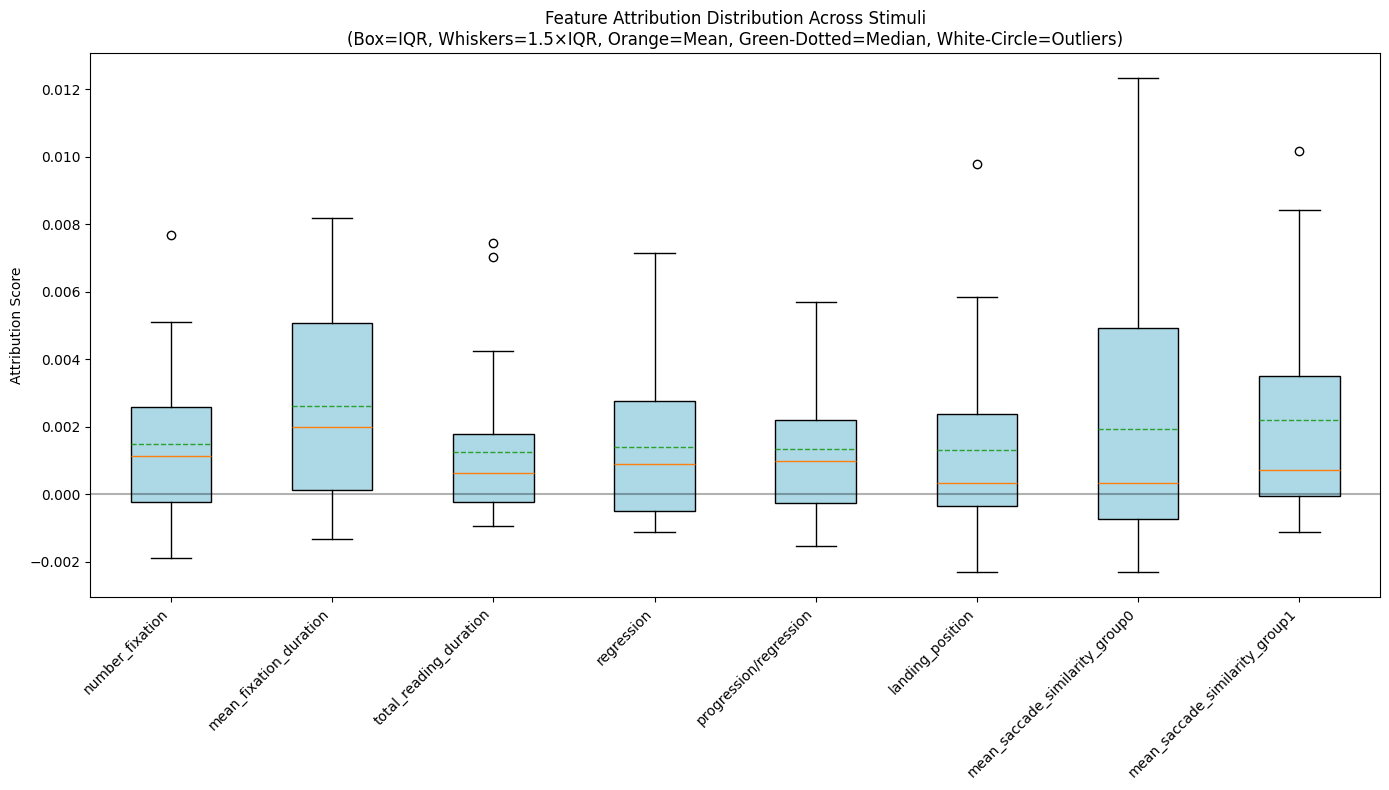


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0015, Std= 0.0022, Min=-0.0019, Max= 0.0077
mean_fixation_duration        : Mean= 0.0026, Std= 0.0028, Min=-0.0013, Max= 0.0082
total_reading_duration        : Mean= 0.0012, Std= 0.0021, Min=-0.0009, Max= 0.0075
regression                    : Mean= 0.0014, Std= 0.0023, Min=-0.0011, Max= 0.0071
progression/regression        : Mean= 0.0013, Std= 0.0021, Min=-0.0015, Max= 0.0057
landing_position              : Mean= 0.0013, Std= 0.0026, Min=-0.0023, Max= 0.0098
mean_saccade_similarity_group0: Mean= 0.0019, Std= 0.0035, Min=-0.0023, Max= 0.0123
mean_saccade_similarity_group1: Mean= 0.0022, Std= 0.0032, Min=-0.0011, Max= 0.0102


In [59]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [60]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [61]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.78631591796875
Epoch 5 loss: 0.39756566286087036
Epoch 10 loss: 0.3390904664993286
Epoch 15 loss: 0.32091811299324036
Epoch 0 loss: 0.7486640810966492
Epoch 5 loss: 0.4461665153503418
Epoch 10 loss: 0.3662570118904114
Epoch 15 loss: 0.33173564076423645
Epoch 0 loss: 0.6957553029060364
Epoch 5 loss: 0.37527981400489807
Epoch 10 loss: 0.3292631506919861
Epoch 15 loss: 0.31544041633605957
Epoch 0 loss: 0.6952509880065918
Epoch 5 loss: 0.40553316473960876
Epoch 10 loss: 0.3367461562156677
Epoch 15 loss: 0.31730473041534424
Epoch 0 loss: 0.71809983253479
Epoch 5 loss: 0.3976599872112274
Epoch 10 loss: 0.3304508626461029
Epoch 15 loss: 0.33006805181503296
Epoch 0 loss: 0.7504222393035889
Epoch 5 loss: 0.4160630404949188
Epoch 10 loss: 0.35403069853782654
Epoch 15 loss: 0.32124263048171997
Epoch 0 loss: 0.7415086627006531
Epoch 5 loss: 0.3825508654117584
Epoch 10 loss: 0.3369767367839813
Epoch 15 loss: 0.3204178512096405
Epoch 0 loss: 0.7061646580696106
Epoc

Approximation Error: 9.088596561923623e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_172144\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


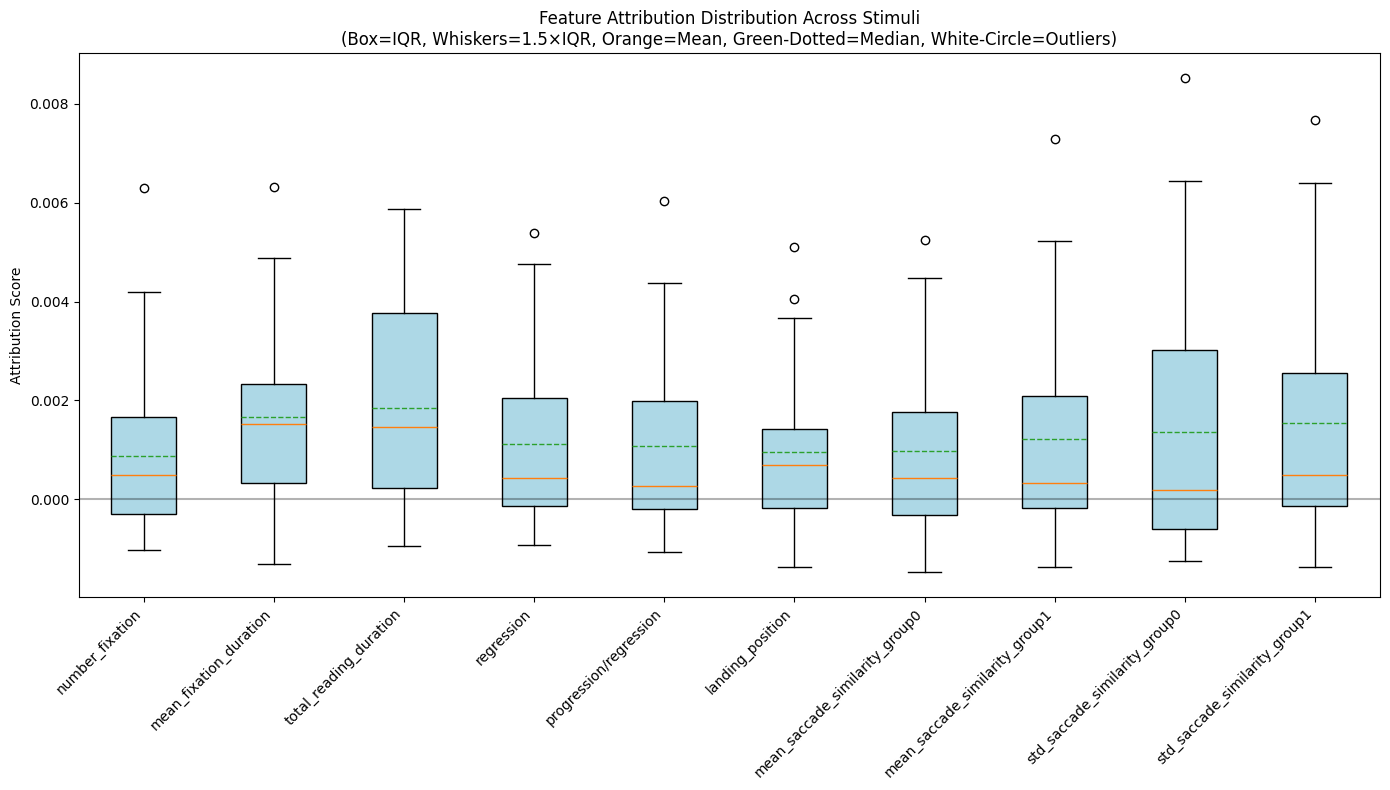


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0009, Std= 0.0016, Min=-0.0010, Max= 0.0063
mean_fixation_duration        : Mean= 0.0017, Std= 0.0019, Min=-0.0013, Max= 0.0063
total_reading_duration        : Mean= 0.0018, Std= 0.0020, Min=-0.0009, Max= 0.0059
regression                    : Mean= 0.0011, Std= 0.0017, Min=-0.0009, Max= 0.0054
progression/regression        : Mean= 0.0011, Std= 0.0017, Min=-0.0011, Max= 0.0060
landing_position              : Mean= 0.0010, Std= 0.0016, Min=-0.0014, Max= 0.0051
mean_saccade_similarity_group0: Mean= 0.0010, Std= 0.0016, Min=-0.0015, Max= 0.0053
mean_saccade_similarity_group1: Mean= 0.0012, Std= 0.0020, Min=-0.0014, Max= 0.0073
std_saccade_similarity_group0 : Mean= 0.0014, Std= 0.0026, Min=-0.0013, Max= 0.0085
std_saccade_similarity_group1 : Mean= 0.0015, Std= 0.0023, Min=-0.0014, Max= 0.0077


In [62]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### 

#### All features

In [63]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [64]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7592453956604004
Epoch 5 loss: 0.4203183054924011
Epoch 10 loss: 0.3426669239997864
Epoch 15 loss: 0.3204653859138489
Epoch 0 loss: 0.7303985357284546
Epoch 5 loss: 0.3865587115287781
Epoch 10 loss: 0.3274671733379364
Epoch 15 loss: 0.3139295279979706
Epoch 0 loss: 0.7580602169036865
Epoch 5 loss: 0.38629329204559326
Epoch 10 loss: 0.3376818299293518
Epoch 15 loss: 0.3142658770084381
Epoch 0 loss: 0.6853206157684326
Epoch 5 loss: 0.3855540156364441
Epoch 10 loss: 0.33918091654777527
Epoch 15 loss: 0.3160875141620636
Epoch 0 loss: 0.6850193738937378
Epoch 5 loss: 0.3504049777984619
Epoch 10 loss: 0.33311694860458374
Epoch 15 loss: 0.3138841688632965
Epoch 0 loss: 0.7023083567619324
Epoch 5 loss: 0.3882487714290619
Epoch 10 loss: 0.32291263341903687
Epoch 15 loss: 0.3178248405456543
Epoch 0 loss: 0.7161815762519836
Epoch 5 loss: 0.36492690443992615
Epoch 10 loss: 0.34030643105506897
Epoch 15 loss: 0.326408714056015
Epoch 0 loss: 0.7929766774177551
Epoch

In [65]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7592453956604004
Epoch 5 loss: 0.4478016495704651
Epoch 10 loss: 0.37114840745925903
Epoch 15 loss: 0.3373875021934509
Epoch 0 loss: 0.7303985357284546
Epoch 5 loss: 0.41223976016044617
Epoch 10 loss: 0.3510662317276001
Epoch 15 loss: 0.3251975476741791
Epoch 0 loss: 0.7580602169036865
Epoch 5 loss: 0.39166736602783203
Epoch 10 loss: 0.3564569354057312
Epoch 15 loss: 0.3299918472766876
Epoch 0 loss: 0.6853206157684326
Epoch 5 loss: 0.4149455428123474
Epoch 10 loss: 0.3675074577331543
Epoch 15 loss: 0.33314022421836853
Epoch 0 loss: 0.6850193738937378
Epoch 5 loss: 0.36951392889022827
Epoch 10 loss: 0.3526114523410797
Epoch 15 loss: 0.32457229495048523
Epoch 0 loss: 0.7023083567619324
Epoch 5 loss: 0.40801629424095154
Epoch 10 loss: 0.34275200963020325
Epoch 15 loss: 0.33235225081443787
Epoch 0 loss: 0.7161815762519836
Epoch 5 loss: 0.3837737441062927
Epoch 10 loss: 0.35421353578567505
Epoch 15 loss: 0.33314529061317444
Epoch 0 loss: 0.7929766774177551

Approximation Error: -0.00011924828140763566 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_172144\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


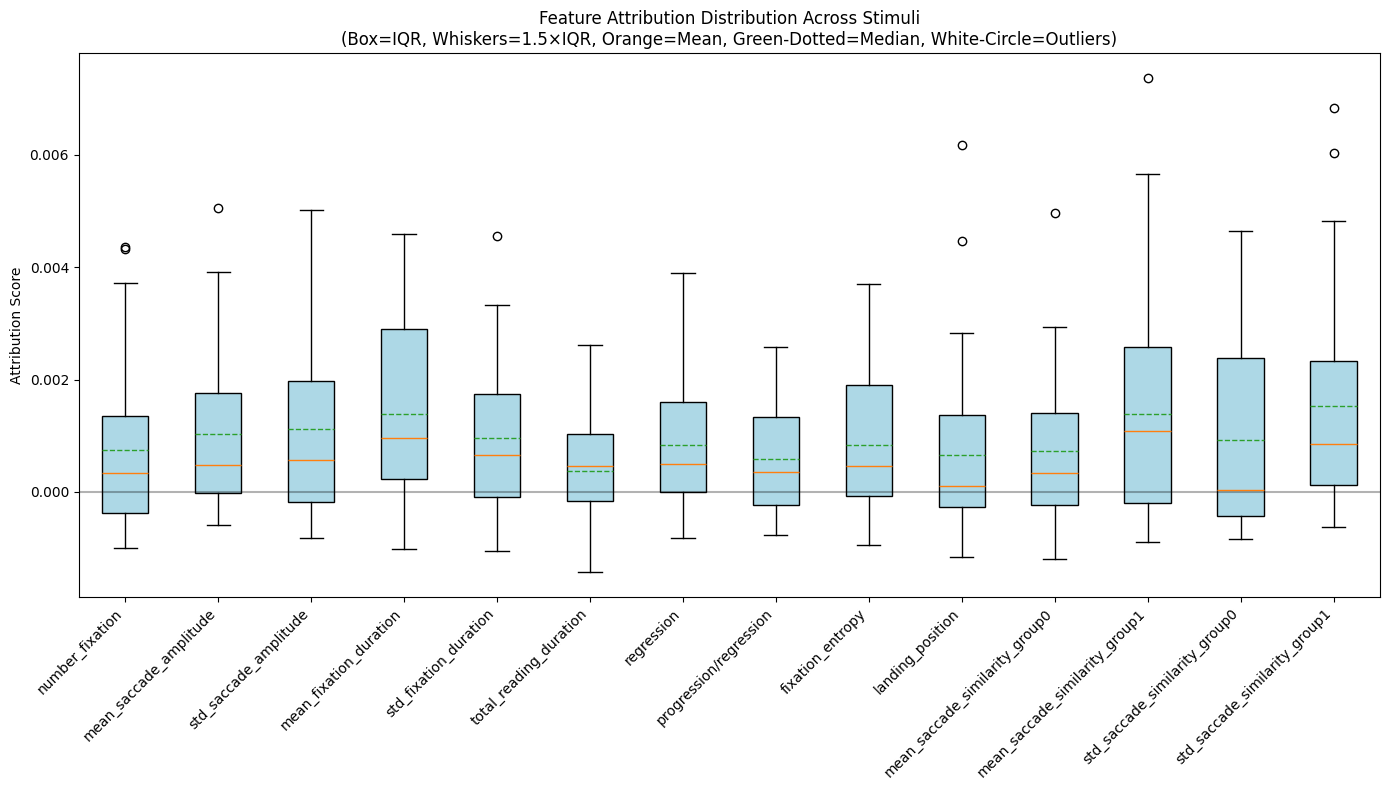


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0008, Std= 0.0014, Min=-0.0010, Max= 0.0044
mean_saccade_amplitude        : Mean= 0.0010, Std= 0.0015, Min=-0.0006, Max= 0.0051
std_saccade_amplitude         : Mean= 0.0011, Std= 0.0016, Min=-0.0008, Max= 0.0050
mean_fixation_duration        : Mean= 0.0014, Std= 0.0015, Min=-0.0010, Max= 0.0046
std_fixation_duration         : Mean= 0.0010, Std= 0.0014, Min=-0.0011, Max= 0.0045
total_reading_duration        : Mean= 0.0004, Std= 0.0009, Min=-0.0014, Max= 0.0026
regression                    : Mean= 0.0008, Std= 0.0012, Min=-0.0008, Max= 0.0039
progression/regression        : Mean= 0.0006, Std= 0.0010, Min=-0.0008, Max= 0.0026
fixation_entropy              : Mean= 0.0008, Std= 0.0013, Min=-0.0009, Max= 0.0037
landing_position              : Mean= 0.0007, Std= 0.0016, Min=-0.0012, Max= 0.0062
mean_saccade_similarity_group0: Mean= 0.0007, Std= 0.0014, Min=-0.001

In [66]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

In [67]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [68]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli,0.5)

Using device: cuda
Epoch 0 loss: 0.7347041368484497
Epoch 5 loss: 0.4572412967681885
Epoch 10 loss: 0.36086592078208923
Epoch 15 loss: 0.34583836793899536
Epoch 0 loss: 0.7682300209999084
Epoch 5 loss: 0.47577011585235596
Epoch 10 loss: 0.3769972026348114
Epoch 15 loss: 0.35148027539253235
Epoch 0 loss: 0.7087334990501404
Epoch 5 loss: 0.45435816049575806
Epoch 10 loss: 0.38957664370536804
Epoch 15 loss: 0.3609462082386017
Epoch 0 loss: 0.6820605397224426
Epoch 5 loss: 0.4325857162475586
Epoch 10 loss: 0.3589249551296234
Epoch 15 loss: 0.3432895839214325
Epoch 0 loss: 0.7103318572044373
Epoch 5 loss: 0.45388686656951904
Epoch 10 loss: 0.4054923355579376
Epoch 15 loss: 0.3638477921485901
Epoch 0 loss: 0.6760368943214417
Epoch 5 loss: 0.4222099781036377
Epoch 10 loss: 0.3660152852535248
Epoch 15 loss: 0.3345687985420227
Epoch 0 loss: 0.7668532133102417
Epoch 5 loss: 0.4738817811012268
Epoch 10 loss: 0.37828347086906433
Epoch 15 loss: 0.33520540595054626
Epoch 0 loss: 0.7562089562416077
E